<a href="https://colab.research.google.com/github/olinyoder2534/TensorflowPractice/blob/main/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Loading Data

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:1]

[PosixPath('datasets/flower_photos/dandelion/6994931380_a7588c1192_m.jpg')]

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3670

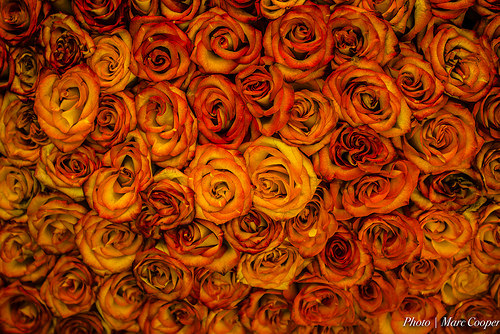

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

Cleaning

In [8]:
#create dictionaries for flower types
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

array([[[  5,  45, 141],
        [  0,  41, 151],
        [  0,  60, 131],
        ...,
        [  0,  10,  70],
        [  0,   5,  48],
        [  0,   9,  38]],

       [[  2,  39, 131],
        [  3,  48, 159],
        [  8,  63, 136],
        ...,
        [  8,   0,  38],
        [  2,   0,  42],
        [  4,   0,  56]],

       [[  0,  24, 109],
        [  5,  44, 153],
        [  2,  52, 124],
        ...,
        [  4,   6,  37],
        [  0,   0,  30],
        [  3,   3,  33]],

       ...,

       [[  0,   6,  21],
        [  0,   4,  27],
        [  0,   4,  39],
        ...,
        [  0,   8,  25],
        [  2,   6,  24],
        [  8,  15,  35]],

       [[  3,   7,  26],
        [  0,   4,  25],
        [  1,   5,  34],
        ...,
        [  0,   6,  28],
        [  0,   4,  26],
        [  1,  10,  37]],

       [[  3,   3,  27],
        [  0,   1,  25],
        [  0,   3,  28],
        ...,
        [  0,   8,  33],
        [  0,   3,  26],
        [  0,   7,  34]]], dtype=uint8)
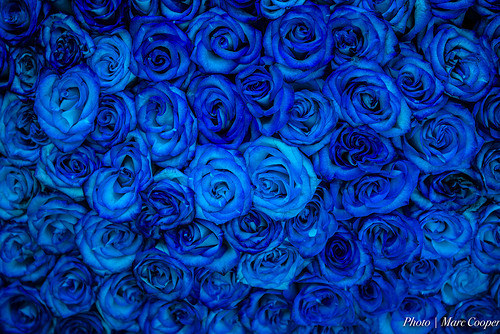

In [9]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

In [10]:
#resize images
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [11]:
#convert to NP array
X = np.array(X)
y = np.array(y)

Modeling

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train.shape

(2752, 180, 180, 3)

In [15]:
model = Sequential([
    layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 82s 933ms/step - loss: 1.2896 - accuracy: 0.4542
Epoch 2/10
86/86 [==============================] - 79s 916ms/step - loss: 0.9717 - accuracy: 0.6203
Epoch 3/10
86/86 [==============================] - 80s 929ms/step - loss: 0.8155 - accuracy: 0.6926
Epoch 4/10
86/86 [==============================] - 78s 912ms/step - loss: 0.5918 - accuracy: 0.7816
Epoch 5/10
86/86 [==============================] - 79s 917ms/step - loss: 0.3862 - accuracy: 0.8630
Epoch 6/10
86/86 [==============================] - 78s 907ms/step - loss: 0.2189 - accuracy: 0.9273
Epoch 7/10
86/86 [==============================] - 84s 979ms/step - loss: 0.1197 - accuracy: 0.9597
Epoch 8/10
86/86 [==============================] - 80s 928ms/step - loss: 0.0947 - accuracy: 0.9709
Epoch 9/10
86/86 [==============================] - 80s 921ms/step - loss: 0.0584 - accuracy: 0.9840
Epoch 10/10
86/86 [==============================] - 79s 919ms/step - loss: 0.0397 - accura

In [16]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 11s 357ms/step - loss: 1.7965 - accuracy: 0.6580


[1.7964543104171753, 0.657952070236206]

In [17]:
predictions = model.predict(X_test)

29/29 [==============================] - 9s 297ms/step


In [18]:
np.argmax(predictions[1])

0

In [19]:
y_test[1]

0

Data Augmentation

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.25),
  ]
)

In [21]:
model2 = Sequential([
    data_augmentation,

    layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation = 'softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 95s 1s/step - loss: 1.2929 - accuracy: 0.4411
Epoch 2/10
86/86 [==============================] - 94s 1s/step - loss: 1.0817 - accuracy: 0.5541
Epoch 3/10
86/86 [==============================] - 93s 1s/step - loss: 0.9690 - accuracy: 0.6159
Epoch 4/10
86/86 [==============================] - 97s 1s/step - loss: 0.8868 - accuracy: 0.6381
Epoch 5/10
86/86 [==============================] - 93s 1s/step - loss: 0.8610 - accuracy: 0.6624
Epoch 6/10
86/86 [==============================] - 93s 1s/step - loss: 0.8033 - accuracy: 0.6846
Epoch 7/10
86/86 [==============================] - 93s 1s/step - loss: 0.7777 - accuracy: 0.6962
Epoch 8/10
86/86 [==============================] - 93s 1s/step - loss: 0.7434 - accuracy: 0.7035
Epoch 9/10
86/86 [==============================] - 93s 1s/step - loss: 0.7387 - accuracy: 0.7031
Epoch 10/10
86/86 [==============================] - 99s 1s/step - loss: 0.6919 - accuracy: 0.7329


In [22]:
model2.evaluate(X_test,y_test)

29/29 [==============================] - 11s 387ms/step - loss: 0.8626 - accuracy: 0.6786


[0.8626043200492859, 0.6786492466926575]

In [23]:
predictions2 = model2.predict(X_test)

29/29 [==============================] - 8s 262ms/step


In [24]:
np.argmax(predictions2[235])

2

In [25]:
y_test[235]

2